Importamos la diferentes librerias 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind

LECTURA DE DATOS 

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/datasets/games.csv'

In [ ]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
games_data.columns = games_data.columns.str.lower()

In [ ]:
games_data.info()
display(games_data.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Conversion de datos: Se realiza cambios en las columnas 'user_score', 'year_of_release' y 'rating' para convertirlas en tipo float64, int y category para poder realizar un mejor calculo mas adelante.

In [ ]:
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')
games_data['rating'] = games_data['rating'].astype('category')


In [ ]:
games_data.info()

display(games_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 1.3+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
series1 = games_data['critic_score']
series2 = games_data['user_score']

t_stat, p_value = ttest_ind(series1, series2, nan_policy='omit')

display(games_data.info())
display(games_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16713 non-null  object  
 1   platform         16715 non-null  object  
 2   year_of_release  16446 non-null  float64 
 3   genre            16713 non-null  object  
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     8137 non-null   float64 
 9   user_score       7590 non-null   float64 
 10  rating           9949 non-null   category
dtypes: category(1), float64(7), object(3)
memory usage: 1.3+ MB


None

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
#se crea una nueva columna llamada total_sales
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [ ]:
display(games_data.head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


ANALISIS DE DATOS 

In [ ]:
# Contar la cantidad de juegos lanzados en cada año y cambiar el nombre de la variable
games_year = games_data['year_of_release'].value_counts().sort_index()

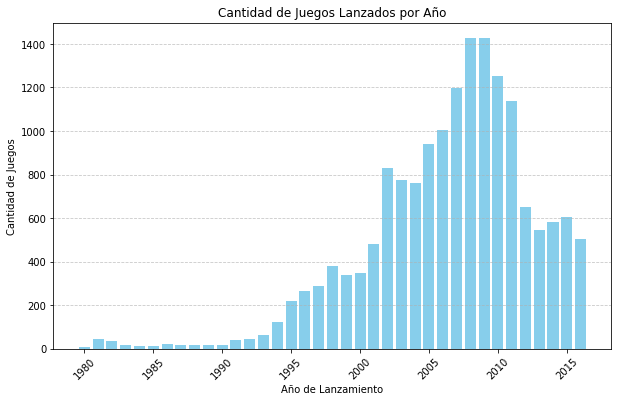

In [ ]:
years_of_interest = list(range(1980, 2017))

games_year = games_year[years_of_interest]


plt.figure(figsize=(10, 6))
plt.bar(games_year.index, games_year.values, color='skyblue')

plt.title('Cantidad de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# Calcular las ventas totales para cada plataforma
ventas_totales_por_plataforma = games_data.groupby('platform')['total_sales'].sum()

# Seleccionar las plataformas con mayores ventas totales
plataformas_top_ventas = ventas_totales_por_plataforma.nlargest() 

display(plataformas_top_ventas)


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

In [ ]:
# Seleccionar datos solo para las plataformas con mayores ventas
datos_top_plataformas = games_data[games_data['platform'].isin(plataformas_top_ventas.index)]


In [ ]:
# Construir una distribución basada en los datos de cada año
distribucion_ventas_por_anio = datos_top_plataformas.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()


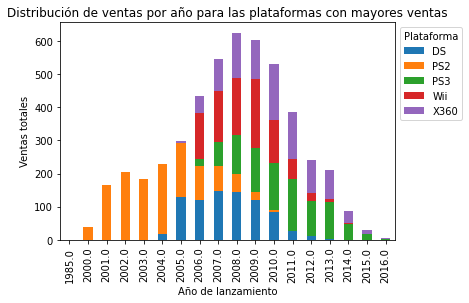

In [ ]:
# Visualizar la distribución
distribucion_ventas_por_anio.plot(kind='bar', stacked=True)
plt.title('Distribución de ventas por año para las plataformas con mayores ventas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales')
plt.legend(title='Plataforma', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [ ]:
# Calcular el tiempo que tardan las nuevas plataformas en aparecer
nuevo_lanzamiento = games_data.groupby('platform')['year_of_release'].mean()
display(nuevo_lanzamiento)

platform
2600    1982.137931
3DO     1994.666667
3DS     2013.126953
DC      1999.942308
DS      2008.185290
GB      1995.958763
GBA     2003.210851
GC      2003.400369
GEN     1993.034483
GG      1992.000000
N64     1998.531646
NES     1987.153061
NG      1994.500000
PC      2008.914316
PCFX    1996.000000
PS      1998.005882
PS2     2004.583921
PS3     2010.840735
PS4     2015.145408
PSP     2008.731769
PSV     2014.132867
SAT     1996.028902
SCD     1993.833333
SNES    1993.845188
TG16    1995.000000
WS      2000.000000
Wii     2008.966563
WiiU    2013.659864
X360    2009.880682
XB      2003.636364
XOne    2014.951417
Name: year_of_release, dtype: float64

In [ ]:
# Calcular el tiempo que tardan las antiguas plataformas en desaparecer
desaparicion = games_data.groupby('platform')['year_of_release'].max()


In [ ]:
# Calcular la diferencia de años
tiempo_aparicion = games_data.groupby('platform')['year_of_release'].min().sort_values().diff().mean()
tiempo_desaparicion = games_data.groupby('platform')['year_of_release'].nunique().mean()

print(f"Tiempo promedio para que aparezcan nuevas plataformas: {tiempo_aparicion} años")
print(f"Tiempo promedio para que desaparezcan antiguas plataformas: {tiempo_desaparicion} años")

Tiempo promedio para que aparezcan nuevas plataformas: 1.1 años
Tiempo promedio para que desaparezcan antiguas plataformas: 7.67741935483871 años


Error Cuadrático Medio en el conjunto de prueba: 1.0671487365490586


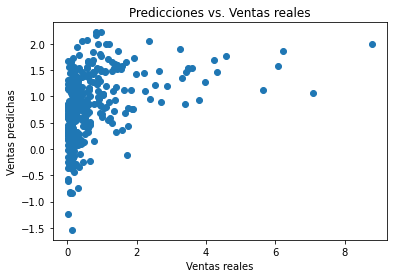

In [ ]:
# Filtrar datos para el rango de años seleccionado
datos_entrenamiento = games_data[(games_data['year_of_release'] >= 2011) & (games_data['year_of_release'] <= 2016)]

# Quitar filas con valores NaN o infinitos
datos_entrenamiento = datos_entrenamiento.dropna(subset=['critic_score', 'user_score'])
datos_entrenamiento = datos_entrenamiento.drop(datos_entrenamiento[np.isinf(datos_entrenamiento['total_sales'])].index)

# Limitar el rango de valores permitidos
datos_entrenamiento['total_sales'] = np.clip(datos_entrenamiento['total_sales'], 0, 1e6)

# Seleccionar características relevantes
caracteristicas = ['year_of_release', 'critic_score', 'user_score']
X = datos_entrenamiento[caracteristicas]
y = datos_entrenamiento['total_sales']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir un modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Evaluar el rendimiento del modelo
error_cuadratico_medio = mean_squared_error(y_test, predicciones)
print(f'Error Cuadrático Medio en el conjunto de prueba: {error_cuadratico_medio}')

# Visualizar predicciones vs. observaciones reales
plt.scatter(y_test, predicciones)
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Predicciones vs. Ventas reales')
plt.show()


In [ ]:
# Filtrar datos para un rango de años más reciente
datos_relevantes = games_data[games_data['year_of_release'] >= 2011]

# Calcular las ventas totales por plataforma
ventas_por_plataforma = datos_relevantes.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Mostrar las plataformas líderes en ventas
display("Plataformas líderes en ventas:")
display(ventas_por_plataforma.head())


'Plataformas líderes en ventas:'

platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
Name: total_sales, dtype: float64

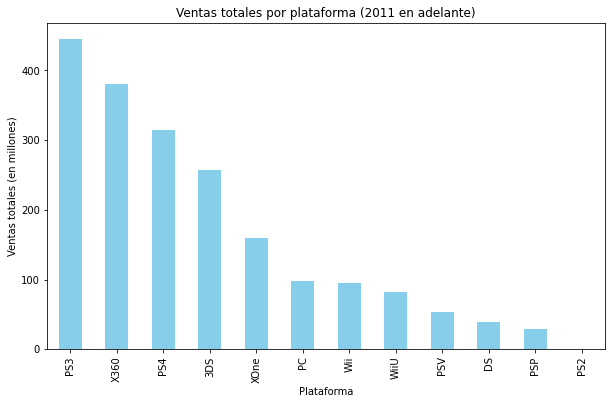

In [ ]:
# Visualizar las ventas totales por plataforma en un gráfico de barras
ventas_por_plataforma.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Ventas totales por plataforma (2011 en adelante)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales (en millones)')
plt.show()


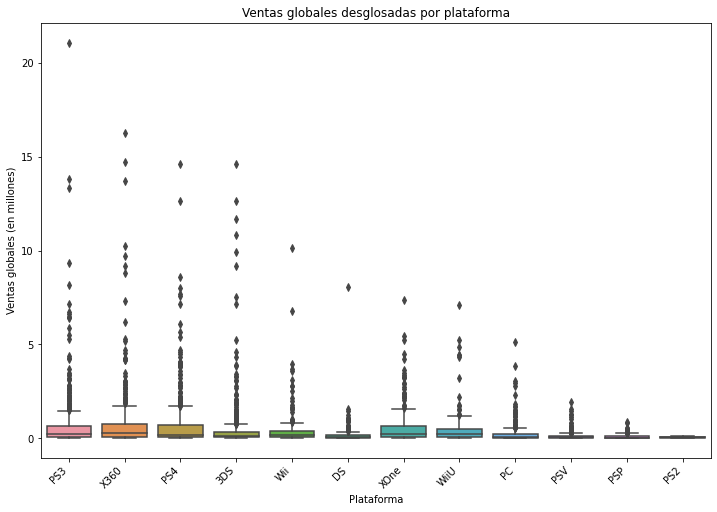

In [ ]:
# Crear un diagrama de caja para las ventas globales desglosadas por plataforma
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=datos_relevantes)
plt.title('Ventas globales desglosadas por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
# Filtrar datos para la plataforma seleccionada, en este caso, PS4
ps4_data = datos_relevantes[datos_relevantes['platform'] == 'PS4']

# Filtrar juegos con reseñas de usuarios y profesionales
ps4_data = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])

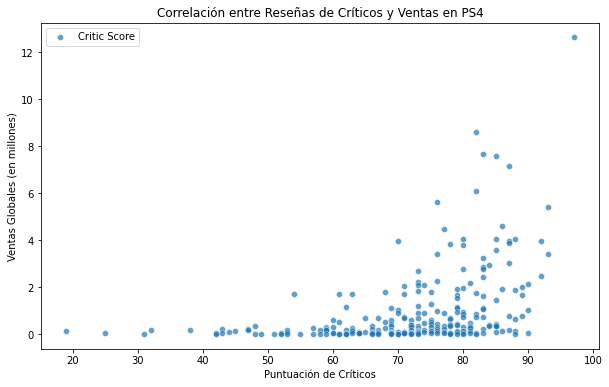

In [ ]:
# Gráfico de dispersión para la puntuación de los críticos
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps4_data, label='Critic Score', alpha=0.7)
plt.title('Correlación entre Reseñas de Críticos y Ventas en PS4')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Globales (en millones)')
plt.legend()
plt.show()

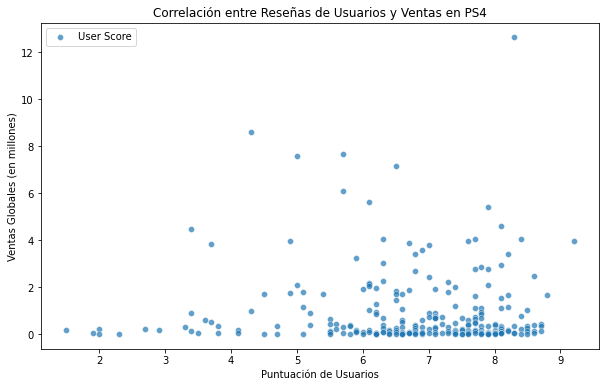

In [ ]:
# Gráfico de dispersión para la puntuación de los usuarios
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='total_sales', data=ps4_data, label='User Score', alpha=0.7)
plt.title('Correlación entre Reseñas de Usuarios y Ventas en PS4')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Globales (en millones)')
plt.legend()
plt.show()

In [ ]:
# Calcular la correlación entre reseñas y ventas
correlacion_critic_sales = ps4_data['critic_score'].corr(ps4_data['total_sales'])
correlacion_user_sales = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre Puntuación de Críticos y Ventas: {correlacion_critic_sales}")
print(f"Correlación entre Puntuación de Usuarios y Ventas: {correlacion_user_sales}")

Correlación entre Puntuación de Críticos y Ventas: 0.40589480145836687
Correlación entre Puntuación de Usuarios y Ventas: -0.03362497596528878


Se nota que la diferencia entre la calificacion de los profesionales influye de forma positiva en las ventas mientras que la calificaion de los usuarios no genera gran cambio en las ventas, al parecer los usuarios confian mas en la calificacion de un profesional que en la de otro usuario.

In [ ]:
# Calcular las ventas totales por género
ventas_por_genero = datos_relevantes.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [ ]:
# Imprimir la tabla de ventas por género
display("\nVentas totales por género:")
display(ventas_por_genero)

'\nVentas totales por género:'

genre
Action          557.80
Shooter         402.91
Role-Playing    245.63
Sports          237.15
Misc            139.42
Platform         88.68
Racing           88.31
Fighting         66.90
Simulation       50.26
Adventure        45.04
Strategy         22.16
Puzzle            9.85
Name: total_sales, dtype: float64

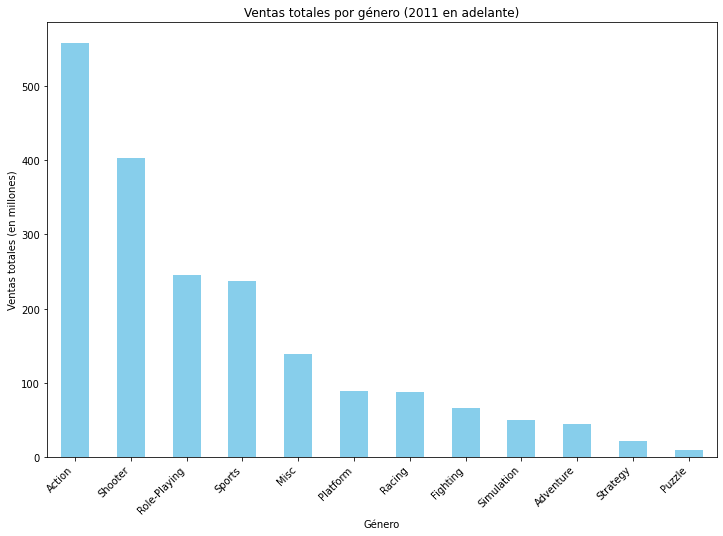

In [ ]:
# Visualizar las ventas totales por género en un gráfico de barras
plt.figure(figsize=(12, 8))
ventas_por_genero.plot(kind='bar', color='skyblue')
plt.title('Ventas totales por género (2011 en adelante)')
plt.xlabel('Género')
plt.ylabel('Ventas totales (en millones)')
plt.xticks(rotation=45, ha='right')
plt.show()

Se puede visualizar que el genero mas rentable a lo largo del tiempo es el genero 'accion' y se puede ver que es el mas consistente en ventas a lo largo de los años.
Por otro lado el genero 'strategy' y el 'puzzle' son los menos consistentes en cuantos a rentabilidad. 

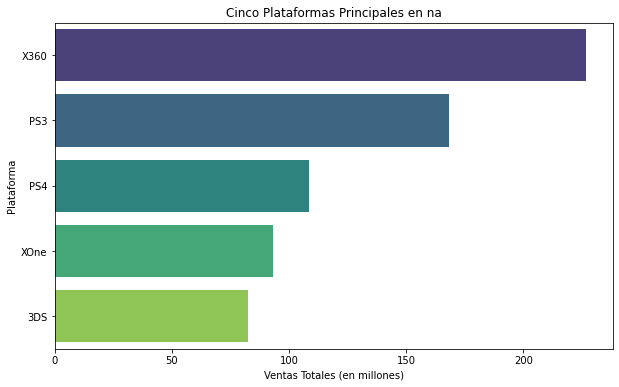

'\nCinco Plataformas Principales en na:'

,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65


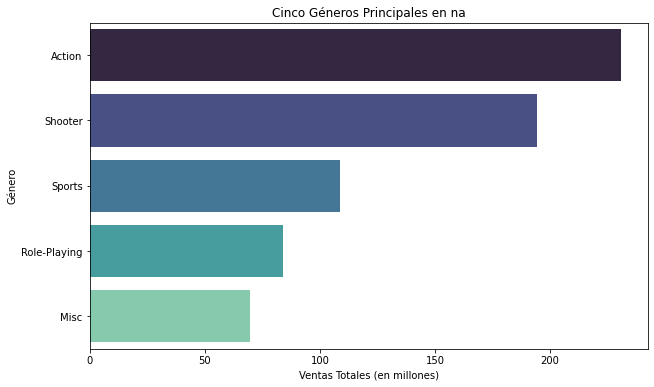

'\nCinco Géneros Principales en na:'

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69


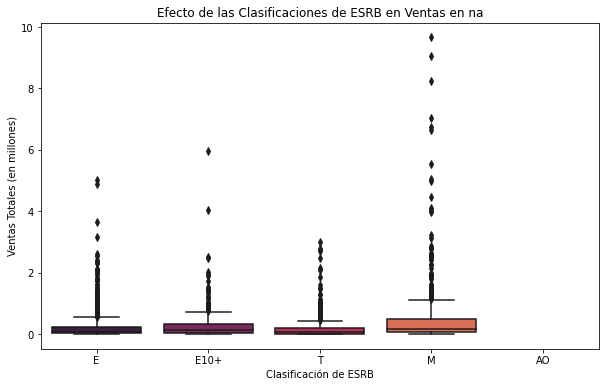

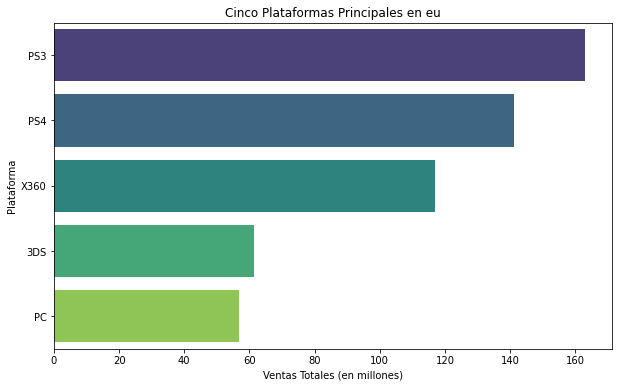

'\nCinco Plataformas Principales en eu:'

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70


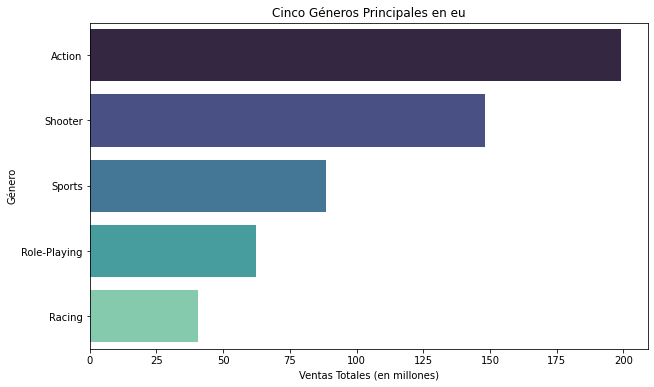

'\nCinco Géneros Principales en eu:'

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58


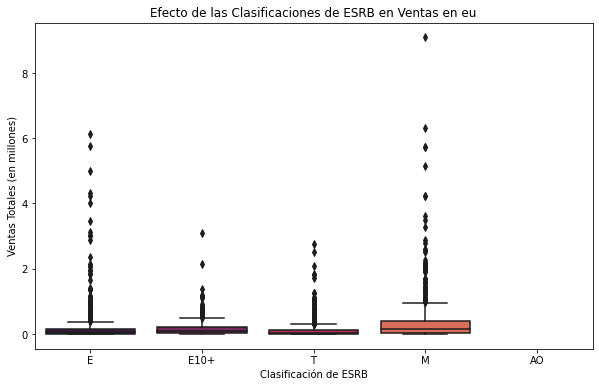

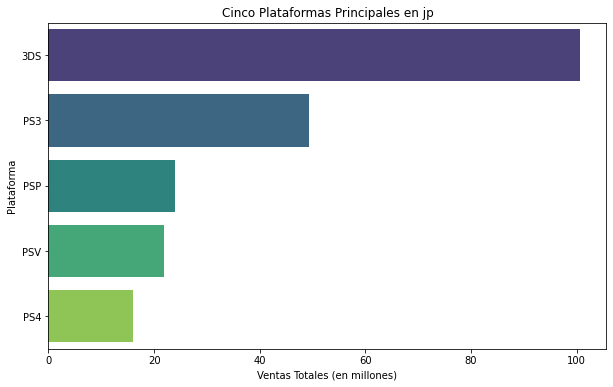

'\nCinco Plataformas Principales en jp:'

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96


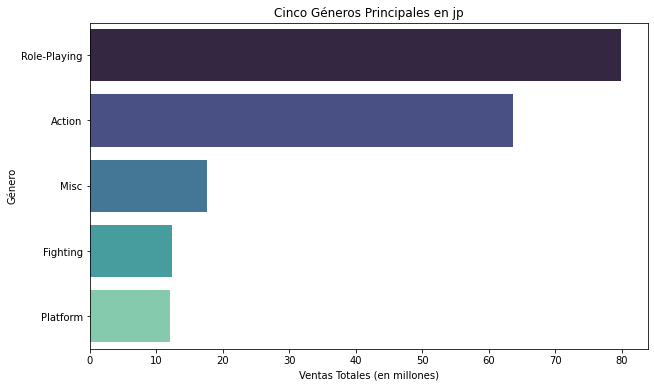

'\nCinco Géneros Principales en jp:'

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13


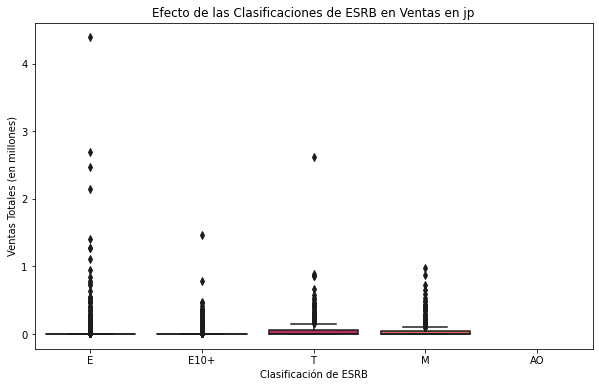

In [ ]:
# Función para crear un perfil de usuario por región
def perfil_usuario_por_region(region):
    datos_region = datos_relevantes.groupby('platform').agg({region + '_sales': 'sum'}).sort_values(by=region + '_sales', ascending=False).head(5)

    # Visualizar las cinco plataformas principales
    plt.figure(figsize=(10, 6))
    sns.barplot(x=datos_region[region + '_sales'], y=datos_region.index, palette='viridis')
    plt.title(f'Cinco Plataformas Principales en {region}')
    plt.xlabel('Ventas Totales (en millones)')
    plt.ylabel('Plataforma')
    plt.show()

    # Mostrar las cinco plataformas principales
    display(f'\nCinco Plataformas Principales en {region}:')
    display(datos_region)

    # Géneros principales
    datos_generos = datos_relevantes.groupby('genre').agg({region + '_sales': 'sum'}).sort_values(by=region + '_sales', ascending=False).head(5)

    # Visualizar los cinco géneros principales
    plt.figure(figsize=(10, 6))
    sns.barplot(x=datos_generos[region + '_sales'], y=datos_generos.index, palette='mako')
    plt.title(f'Cinco Géneros Principales en {region}')
    plt.xlabel('Ventas Totales (en millones)')
    plt.ylabel('Género')
    plt.show()

    # Mostrar los cinco géneros principales
    display(f'\nCinco Géneros Principales en {region}:')
    display(datos_generos)

    # Efecto de las clasificaciones de ESRB en las ventas
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='rating', y=region + '_sales', data=datos_relevantes, order=['E', 'E10+', 'T', 'M', 'AO'], palette='rocket')
    plt.title(f'Efecto de las Clasificaciones de ESRB en Ventas en {region}')
    plt.xlabel('Clasificación de ESRB')
    plt.ylabel('Ventas Totales (en millones)')
    plt.show()

# Crear perfiles de usuario para cada región
perfil_usuario_por_region('na')
perfil_usuario_por_region('eu')
perfil_usuario_por_region('jp')


Se visualiza una similitud entre las 5 plataformas que mas se venden tanto en NA como en EU asi como en los generos mas vendidos. Al mismo tiempo las categorias se mantienen de la misma forma, la categoria M es la mas vendida seguida por la categoria E.
Sin embargo cuando hablamos de JP, podemos ver que las 5 plataformas son distintas ya que se consume mucho mas los productos de su propia fabricacion pero en las categorias podemos ver que las categorias predominantes son la E y la T. 

HIPOTESIS

In [ ]:
# Filtrar datos para las plataformas Xbox One y PC
xbox_one_data = games_data[games_data['platform'] == 'XOne']
pc_data = games_data[games_data['platform'] == 'PC']

# Filtrar datos para los géneros de Acción y Deportes
accion_data = games_data[games_data['genre'] == 'Action']
deportes_data = games_data[games_data['genre'] == 'Sports']

# Prueba de hipótesis 1: Comparación de calificaciones promedio de usuarios para Xbox One y PC
resultado_hipotesis_1 = stats.ttest_ind(xbox_one_data['user_score'].dropna(), pc_data['user_score'].dropna())

# Prueba de hipótesis 2: Comparación de calificaciones promedio de usuarios para Acción y Deportes
resultado_hipotesis_2 = stats.ttest_ind(accion_data['user_score'].dropna(), deportes_data['user_score'].dropna())

# Mostrar los resultados
print(f"Resultado Hipótesis 1 (Xbox One vs. PC): Estadística de Prueba = {resultado_hipotesis_1.statistic}, Valor p = {resultado_hipotesis_1.pvalue}")
print(f"Resultado Hipótesis 2 (Acción vs. Deportes): Estadística de Prueba = {resultado_hipotesis_2.statistic}, Valor p = {resultado_hipotesis_2.pvalue}")


Resultado Hipótesis 1 (Xbox One vs. PC): Estadística de Prueba = -4.368333815003015, Valor p = 1.3896435533548819e-05
Resultado Hipótesis 2 (Acción vs. Deportes): Estadística de Prueba = 1.6259419280500857, Valor p = 0.10406951359049141


Hipotesis 1: Hay diferencias significativas en las calificaciones promedio de usuarios entre Xbox One y PC,  lo que significa que hay evidencia significativa para rechazar la hipótesis nula.

Se puede afirmar que las calificaciones promedio de usuarios son diferentes entre Xbox One y PC. Xbox One tiende a tener calificaciones promedio más bajas en comparación con PC.

Hipotesis 2: No hay diferencias significativas en las calificaciones promedio de usuarios entre los géneros de Acción y Deportes, no hay evidencia suficiente para rechazar la hipótesis nula.

No hay evidencia suficiente para afirmar que las calificaciones promedio de usuarios son diferentes entre los géneros de Acción y Deportes. La diferencia observada no es estadísticamente significativa.

CONCLUSION

Tras el analisis se puede decir que Ps3 sera quien realice mayores ventas para 2017 tomando en cuenta que es una plataforma que se encuentra en el top 3 de las diferentes regiones.